# 繪製ROC曲線

## 載入套件

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## 載入資料

In [1]:
import pandas as pd

df=pd.read_csv('./data/roc_test_data.csv')
df

,predict,actual
0,0.11,0
1,0.35,0
2,0.72,1
3,0.10,1
4,0.99,1
5,0.44,1
6,0.32,0
7,0.80,1
8,0.22,1
9,0.08,0


## 繪製ROC曲線 
1. 計算第二欄的真(1)與假(0)的個數，假設分別為P及N，Y軸切成P格，X軸切成N格，如下圖。
2. 以第一欄降冪排序，從大排到小。
3. 依序掃描第二欄，若是1，就往『上』畫一格，反之，若是0，就往『右』畫一格，直到最後一列，如下圖。

## 計算P及N個數

In [10]:
# 計算第二欄的真(1)與假(0)的個數，假設分別為P及N
P= df[df['actual']==1].shape[0]
N= df[df['actual']==0].shape[0]
print(f'P={P}, N={N}')

# X、Y軸每一格的大小
y_unit=1/P
X_unit=1/N

P=11, N=7


## 根據第1欄降冪排序

In [11]:
df2=df.sort_values(by='predict', ascending=False)
df2

,predict,actual
4,0.99,1
17,0.82,1
7,0.80,1
13,0.73,0
2,0.72,1
16,0.71,1
15,0.65,1
10,0.56,1
11,0.48,0
5,0.44,1


## 掃描表格每一列，第二欄若是1，就往『上』畫一格，反之，若是0，就往『右』畫一格

In [12]:
X, y=[], []
current_X, current_y = 0, 0
for row in df2.itertuples():
    # 若是1，Y加1
    if row[2] == 1:
        current_y+=y_unit
    else: # 若是0，X加1
        current_X+=X_unit
    # 儲存每一點X/Y座標
    X.append(current_X)
    y.append(current_y)

X=np.array(X)        
y=np.array(y)    
print(X, y)

[0.         0.         0.         0.14285714 0.14285714 0.14285714
 0.14285714 0.14285714 0.28571429 0.28571429 0.28571429 0.42857143
 0.57142857 0.57142857 0.71428571 0.71428571 0.85714286 1.        ] [0.09090909 0.18181818 0.27272727 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.63636364 0.72727273 0.81818182 0.81818182
 0.81818182 0.90909091 0.90909091 1.         1.         1.        ]


## 繪製ROC曲線

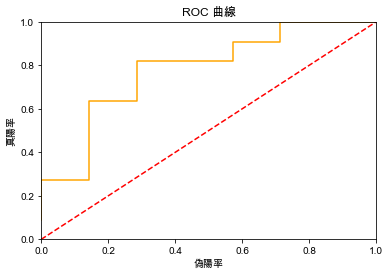

In [15]:
# 修正中文亂碼 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

plt.title('ROC 曲線')
plt.plot(X, y, color = 'orange')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真陽率')
plt.xlabel('偽陽率');

## Scikit-Learn 作法

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, threshold = roc_curve(df['actual'], df['predict'])
print(f'偽陽率:\n{fpr}\n\n真陽率:\n{tpr}\n\n決策門檻:{threshold}')

偽陽率:
[0.         0.         0.         0.14285714 0.14285714 0.28571429
 0.28571429 0.57142857 0.57142857 0.71428571 0.71428571 1.        ]

真陽率:
[0.         0.09090909 0.27272727 0.27272727 0.63636364 0.63636364
 0.81818182 0.81818182 0.90909091 0.90909091 1.         1.        ]

決策門檻:[1.99 0.99 0.8  0.73 0.56 0.48 0.42 0.32 0.22 0.11 0.1  0.03]


## 繪製ROC曲線

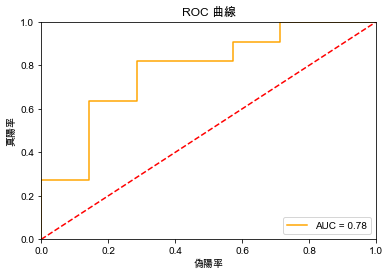

In [19]:
auc1 = auc(fpr, tpr)
plt.title('ROC 曲線')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真陽率')
plt.xlabel('偽陽率');